In [30]:
# imports
import os
import torch
import torchvision
from torch.utils.data import random_split

In [31]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [32]:
train_dataset_path='../ripeness/data/train'
test_dataset_path='../ripeness/data/test'

In [33]:
train_folder = os.listdir(train_dataset_path)
test_folder = os.listdir(test_dataset_path)

In [34]:
print("Train Class: ", len(train_folder))
print("Test Class: ", len(test_folder))

Train Class:  9
Test Class:  9


In [35]:
print(train_folder)

['rotten banana', 'unripe banana', 'ripe banana', 'unripe orange', 'rotten apple', 'ripe orange', 'ripe apple', 'unripe apple', 'rotten orange']


In [36]:
print(test_folder)

['rotten banana', 'unripe banana', 'ripe banana', 'unripe orange', 'rotten apple', 'ripe orange', 'ripe apple', 'unripe apple', 'rotten orange']


In [37]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [38]:
rotten_apple_files = os.listdir(train_dataset_path + "/rotten apple")
print('No. of training examples for plum files:', len(rotten_apple_files))
print(rotten_apple_files[:5])

No. of training examples for plum files: 27
['1_MlnSxRmKwt-os2w3zbLkXg.jpg', 'RottenApple (18).jpg', 'RottenApple (3).jpg', 'RottenApple (199).jpg', '1_5YEatWqtIXa27ANkZ3SlmA.jpg']


In [39]:
dataset = ImageFolder(train_dataset_path, transform=ToTensor())

In [40]:
img, label = dataset[0]
print('img_shape:',img.shape)
print('label:',label)
img

img_shape: torch.Size([3, 677, 1024])
label: 0


tensor([[[0.3137, 0.3098, 0.3020,  ..., 0.3529, 0.3569, 0.3529],
         [0.3137, 0.3098, 0.3020,  ..., 0.2980, 0.3020, 0.2980],
         [0.3137, 0.3098, 0.2980,  ..., 0.2549, 0.2588, 0.2588],
         ...,
         [0.4157, 0.4157, 0.4157,  ..., 0.5294, 0.5294, 0.5294],
         [0.4118, 0.4157, 0.4157,  ..., 0.5294, 0.5255, 0.5255],
         [0.4118, 0.4118, 0.4157,  ..., 0.5294, 0.5255, 0.5255]],

        [[0.3294, 0.3255, 0.3176,  ..., 0.3373, 0.3412, 0.3373],
         [0.3294, 0.3255, 0.3176,  ..., 0.2824, 0.2863, 0.2824],
         [0.3255, 0.3216, 0.3098,  ..., 0.2392, 0.2431, 0.2431],
         ...,
         [0.5529, 0.5529, 0.5529,  ..., 0.5569, 0.5647, 0.5647],
         [0.5490, 0.5529, 0.5529,  ..., 0.5569, 0.5608, 0.5608],
         [0.5490, 0.5490, 0.5529,  ..., 0.5569, 0.5608, 0.5608]],

        [[0.0392, 0.0353, 0.0275,  ..., 0.0863, 0.0902, 0.0863],
         [0.0392, 0.0353, 0.0275,  ..., 0.0314, 0.0392, 0.0314],
         [0.0471, 0.0431, 0.0314,  ..., 0.0000, 0.0039, 0.

In [41]:
print(dataset.classes)

['ripe apple', 'ripe banana', 'ripe orange', 'rotten apple', 'rotten banana', 'rotten orange', 'unripe apple', 'unripe banana', 'unripe orange']


In [42]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [43]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [44]:
from torch.utils.data.dataloader import DataLoader
batch_size=8

In [45]:
from torchvision import datasets

In [46]:
train_data = datasets.ImageFolder(train_dataset_path, transform=auto_transforms)
test_data = datasets.ImageFolder(test_dataset_path, transform=auto_transforms)

In [47]:
img, label = train_data[0]
print('img_shape:',img.shape)
print('label:',label)
img

img_shape: torch.Size([3, 224, 224])
label: 0


tensor([[[ 0.4337,  0.5364,  0.7591,  ..., -0.9877, -1.1932, -1.2445],
         [ 0.5536,  0.7248,  0.6906,  ..., -1.0390, -0.9877, -0.9363],
         [ 0.7591,  0.7077,  0.6563,  ..., -1.0219, -0.8335, -0.5082],
         ...,
         [ 1.1187,  1.1358,  1.1187,  ...,  0.3309,  0.2967,  0.2282],
         [ 1.0331,  1.0673,  1.0844,  ...,  0.2624,  0.2282,  0.1768],
         [ 0.9303,  0.9817,  1.0502,  ...,  0.1768,  0.1083,  0.1254]],

        [[ 0.9580,  1.0280,  1.2031,  ..., -0.8803, -1.0728, -1.1078],
         [ 1.0980,  1.2556,  1.1856,  ..., -0.8803, -0.8452, -0.7577],
         [ 1.0805,  1.0980,  1.1506,  ..., -0.7927, -0.6001, -0.2675],
         ...,
         [ 1.3256,  1.3081,  1.2906,  ...,  0.9755,  0.9580,  0.9580],
         [ 1.2206,  1.2556,  1.2731,  ...,  0.8880,  0.8880,  0.9055],
         [ 1.1155,  1.1856,  1.2206,  ...,  0.8179,  0.8004,  0.8354]],

        [[-1.1073, -0.8110, -0.3753,  ..., -1.4559, -1.6127, -1.5604],
         [-0.9156, -0.5321, -0.4101,  ..., -1

In [48]:
train_dataloader =  DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=4,
      pin_memory=True,
  )
test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False, # don't need to shuffle test data
      num_workers=4,
      pin_memory=True,
  )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f98766b3cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f98766b21d0>)

In [49]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

In [50]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

In [51]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = 9

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [52]:
# Define loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [53]:
import engine

In [54]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [55]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_dataloader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [56]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.8890 | train_acc: 0.3105 | test_loss: 1.3814 | test_acc: 0.7917
Epoch: 2 | train_loss: 1.2378 | train_acc: 0.7500 | test_loss: 1.0164 | test_acc: 0.8542
Epoch: 3 | train_loss: 0.8873 | train_acc: 0.8669 | test_loss: 0.7881 | test_acc: 0.8229
Epoch: 4 | train_loss: 0.7219 | train_acc: 0.9113 | test_loss: 0.7245 | test_acc: 0.8542
Epoch: 5 | train_loss: 0.6810 | train_acc: 0.8508 | test_loss: 0.6310 | test_acc: 0.8542
[INFO] Total training time: 261.781 seconds


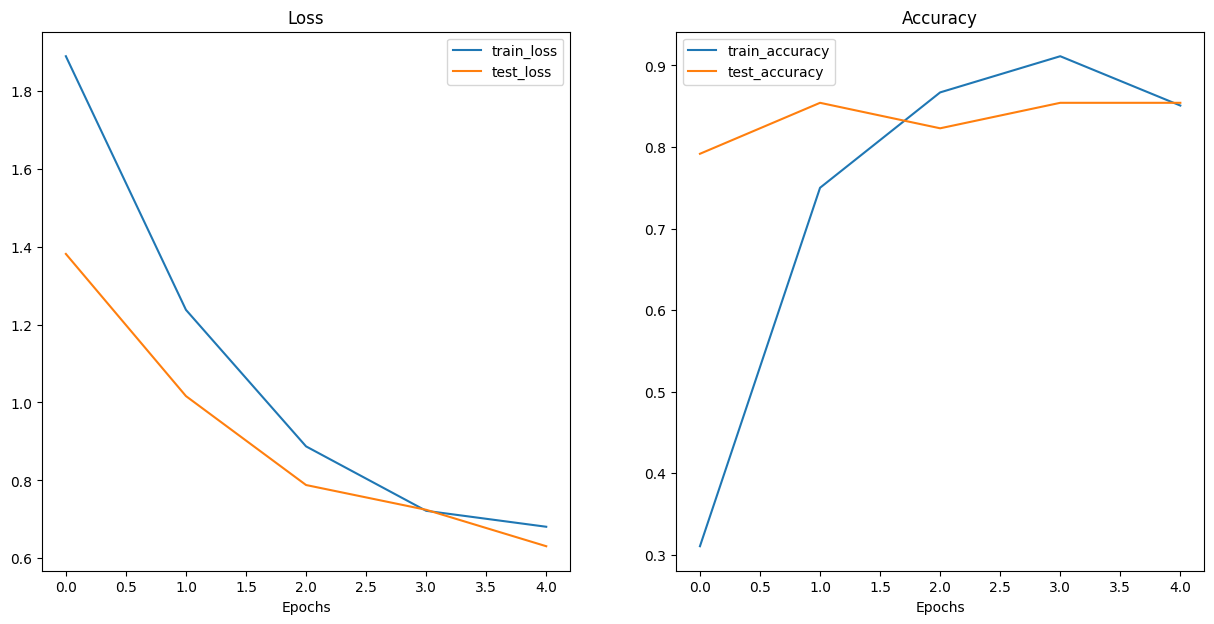

In [57]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [58]:
torch.save(model.state_dict(), 'image_modelweights')
torch.save(model,  "image_entire_model")

predictions


In [59]:
import matplotlib as plt

In [60]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);